# Example 3: Markov Stability applied to directed graph

In [1]:
import networkx as nx
import scipy.sparse as sp

from pygenstability import run, plotting, constructors
from pygenstability.optimal_scales import identify_optimal_scales

In [2]:
# creating directed partitioned graph
nx_graph = nx.planted_partition_graph(4, 20, 0.3, 0.01, seed=42, directed=True)
adjacency = nx.to_numpy_array(nx_graph)

In [3]:
# scan markov scale for communities
all_results = run(sp.csgraph.csgraph_from_dense(adjacency), 
                  min_scale=-1.0, 
                  max_scale=1.0, 
                  n_scale=90, 
                  constructor="directed")

Your graph is directed!
100%|██████████| 90/90 [00:00<00:00, 186.37it/s]


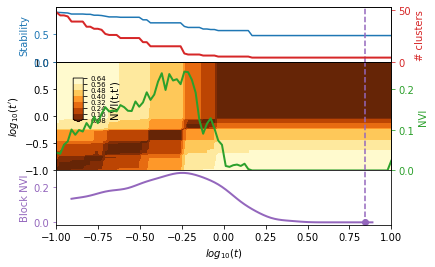

In [4]:
# select optimal scales
all_results = identify_optimal_scales(all_results,kernel_size=30,window_size=10)
_ = plotting.plot_scan(all_results)

In [5]:
# compute graph layout
pos = nx.spring_layout(nx_graph, weight=None, scale=1)
for u in nx_graph:
    nx_graph.nodes[u]["pos"] = pos[u]


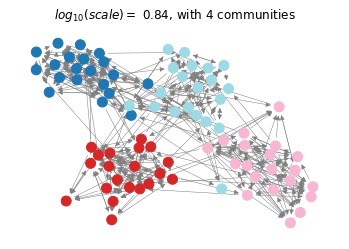

In [6]:
# plot optimal partitions
plotting.plot_optimal_partitions(nx_graph, all_results, show=True)

In [7]:
# scan markov scale for communities using linearized directed
all_results = run(sp.csgraph.csgraph_from_dense(adjacency), 
                  min_scale=-1.0, 
                  max_scale=1.0, 
                  n_scale=90, 
                  constructor="linearized_directed")

Your graph is directed!
100%|██████████| 90/90 [00:00<00:00, 499.42it/s]


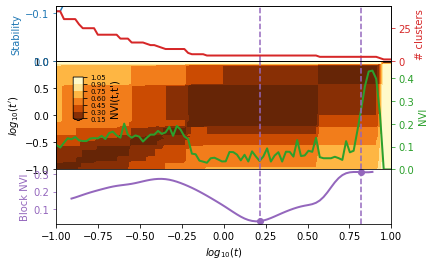

In [8]:
# select optimal scales
all_results = identify_optimal_scales(all_results,kernel_size=30,window_size=10)
_ = plotting.plot_scan(all_results)

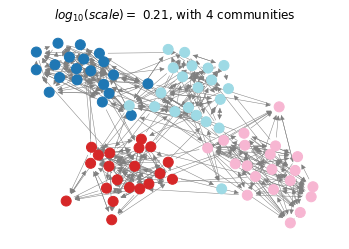

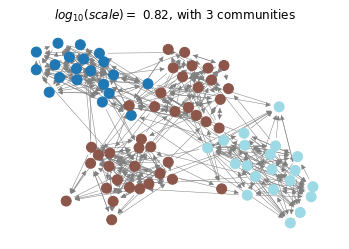

In [9]:
# plot optimal partitions
plotting.plot_optimal_partitions(nx_graph, all_results, show=True)